# Using GRNPipeline
## A GRN analysis and visualization tool for the gene of interest

In [7]:
import sys
sys.path.append('/lustre/groups/ml01/workspace/samantha.bening/Bachelor/')
from importlib import reload
import genereporter.grn_pipeline as ggModule
reload(ggModule)

gg = ggModule.GRNPipeline(wdir="/lustre/groups/ml01/workspace/samantha.bening/Bachelor/", 
                 adata="data2/veo_ibd_balanced_aucell.h5ad",
                 f_adj='src/SCENICfiles/TFtg_adj.csv',
                 f_reg='src/SCENICfiles/reg_full10k.csv', 
                 dir_gg_adj = 'src/SCENICfiles/gg_adj/')
gg

In [3]:
# set GOI
GOI = 'CASP8'

In [3]:
pathways_goi = gg.get_goi_pathways(GOI)
pathways_goi

# Spearman correlation between geneset and GOI expression across all cell types

geneset genesymbol  correlation
0         REACTOME_REGULATION_OF_NF_KAPPA_B_SIGNALING      CASP8     0.240202
1   REACTOME_CASPASE_ACTIVATION_VIA_DEATH_RECEPTOR...      CASP8     0.225575
2            REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS      CASP8     0.220298
3                   REACTOME_NOD1_2_SIGNALING_PATHWAY      CASP8     0.202713
4   REACTOME_NUCLEOTIDE_BINDING_DOMAIN_LEUCINE_RIC...      CASP8     0.201034
5                         REACTOME_REGULATED_NECROSIS      CASP8     0.200855
6          REACTOME_RIPK1_MEDIATED_REGULATED_NECROSIS      CASP8     0.196787
7               REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS      CASP8     0.192598
8   REACTOME_CASPASE_ACTIVATION_VIA_EXTRINSIC_APOP...      CASP8     0.190844
9                              REACTOME_TNF_SIGNALING      CASP8     0.183101
10  REACTOME_TAK1_DEPENDENT_IKK_AND_NF_KAPPA_B_ACT...      CASP8     0.181794
11                 REACTOME_CLEC7A_DECTIN_1_SIGNALING      CASP8     0.173996
12                     REACTOME_PROGRAMMED_CELL_DEATH      CASP8     0.173493
13  REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INT...      CASP8     0.164175
14                                 REACTOME_APOPTOSIS      CASP8     0.164043
15                  REACTOME_DEATH_RECEPTOR_SIGNALING      CASP8     0.160035
16            REACTOME_INTERLEUKIN_1_FAMILY_SIGNALING      CASP8     0.152561
17                   REACTOME_INTERLEUKIN_1_SIGNALING      CASP8     0.151888
18         REACTOME_DISEASES_OF_PROGRAMMED_CELL_DEATH      CASP8     0.147965
19      REACTOME_TNFR1_INDUCED_PROAPOPTOTIC_SIGNALING      CASP8     0.146780
20                 REACTOME_APOPTOTIC_EXECUTION_PHASE      CASP8     0.129255
21            REACTOME_MYD88_INDEPENDENT_TLR4_CASCADE      CASP8     0.118571
22                                      IKZF2_REGULON      CASP8     0.108758
23   REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS      CASP8     0.103956
24                                      IKZF1_REGULON      CASP8     0.103613
25                                       ELF1_REGULON      CASP8     0.100515
26                                      GATA3_REGULON      CASP8     0.096939
27                                       CREM_REGULON      CASP8     0.096684
28               REACTOME_TOLL_LIKE_RECEPTOR_CASCADES      CASP8     0.095853
29         REACTOME_TOLL_LIKE_RECEPTOR_9_TLR9_CASCADE      CASP8     0.094180
30      REACTOME_TOLL_LIKE_RECEPTOR_TLR1_TLR2_CASCADE      CASP8     0.091920
31                                      RUNX3_REGULON      CASP8     0.090005
32                                       IRF1_REGULON      CASP8     0.054595
33                                      STAT1_REGULON      CASP8    -0.019003

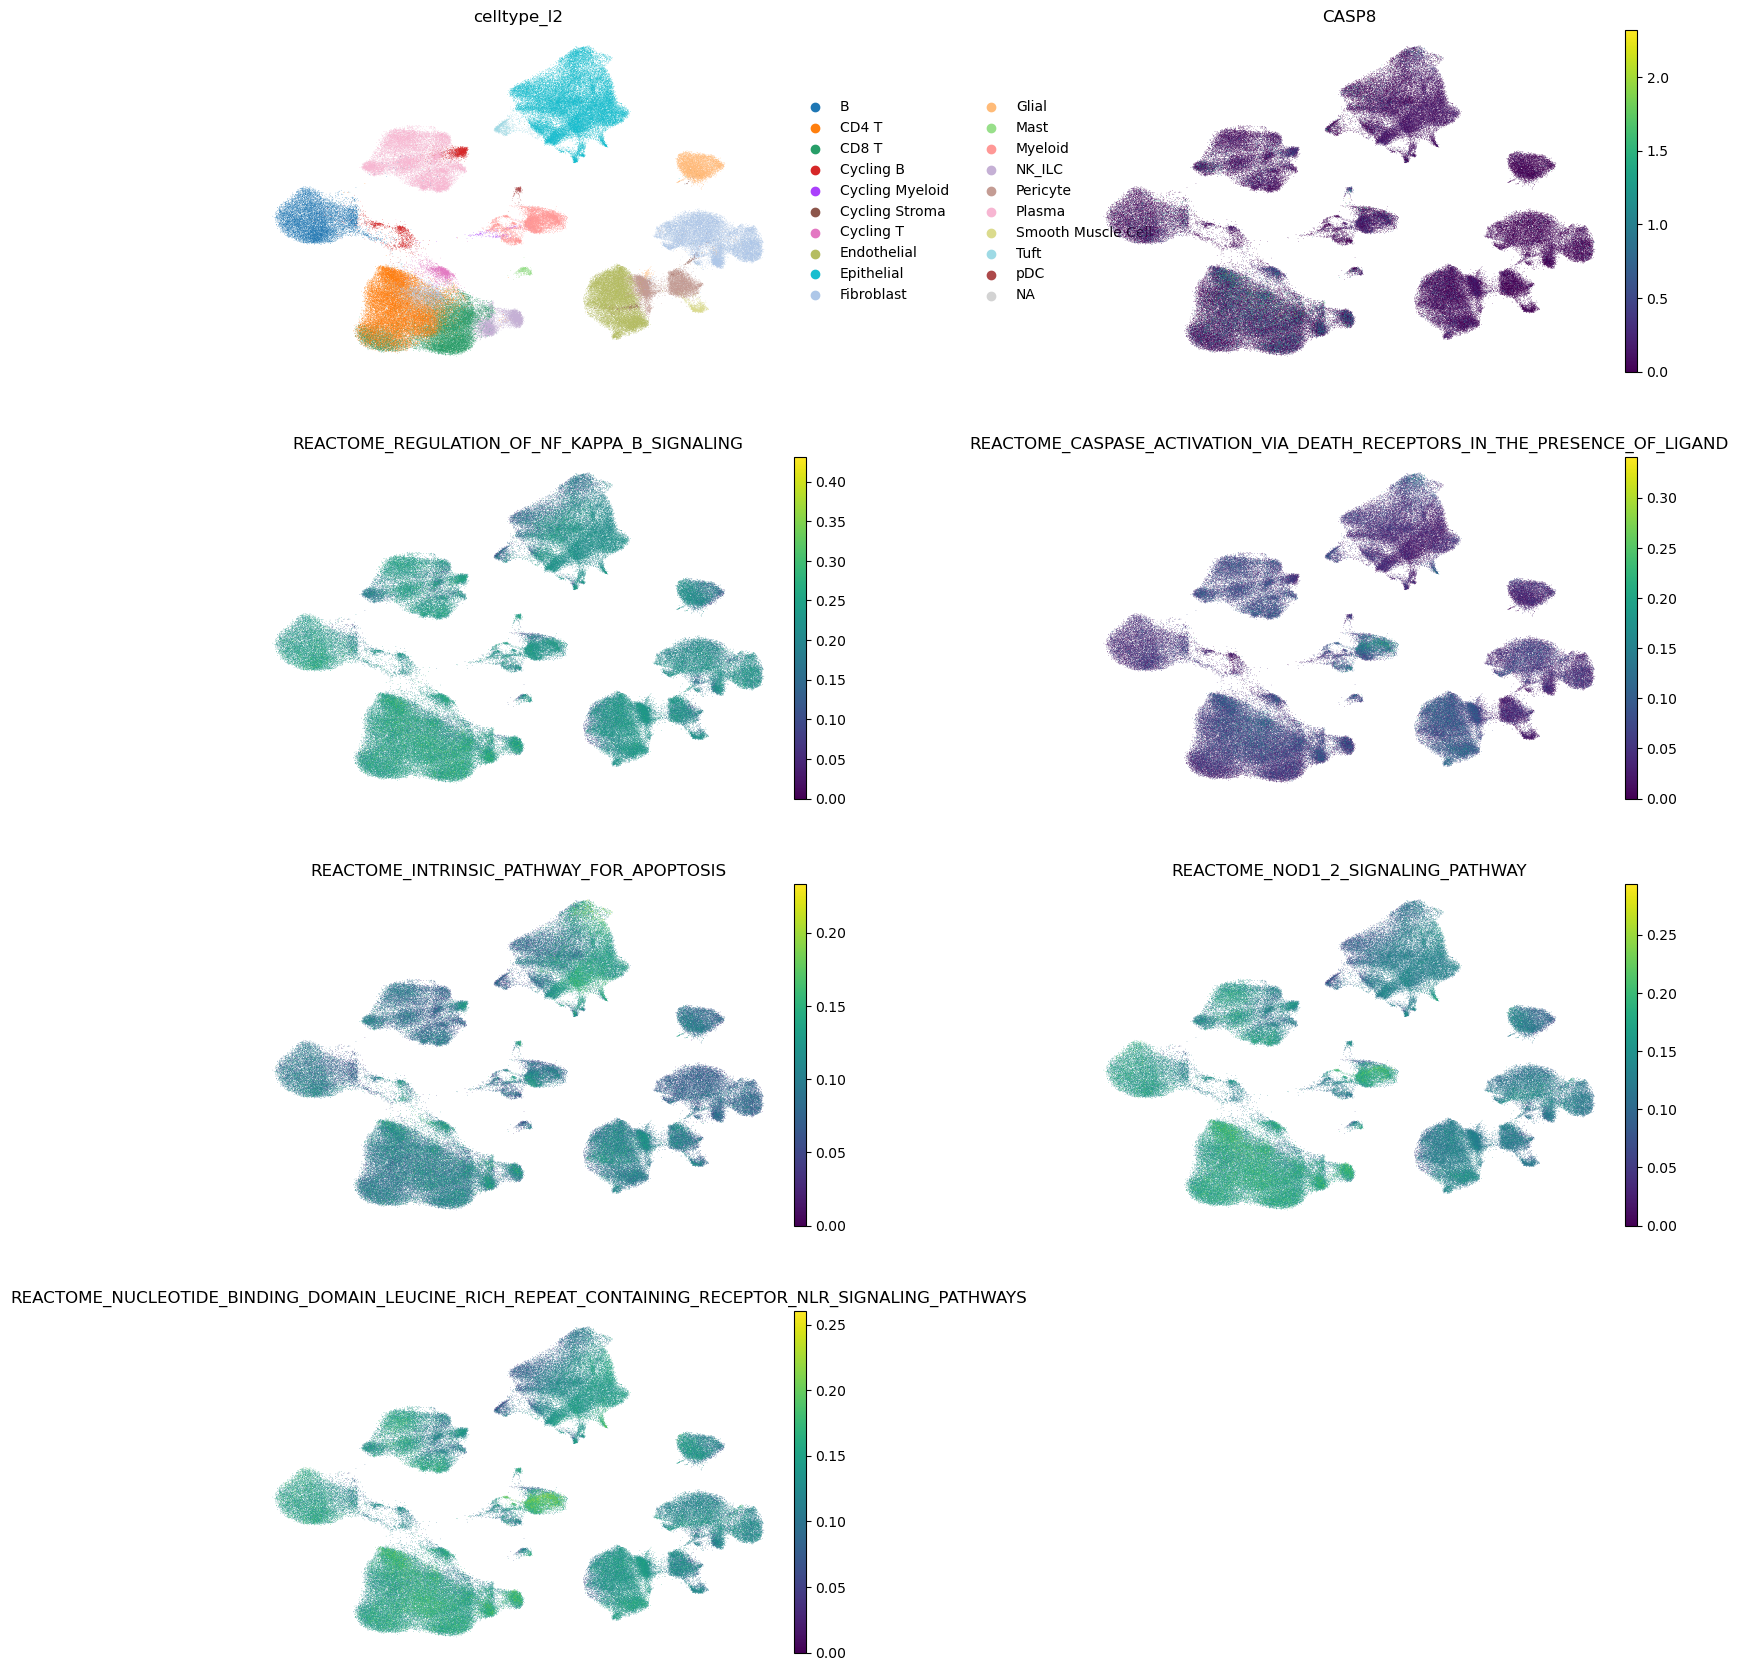

In [4]:
gg.plot_pathways(pathways_goi, GOI)
# cell types and GOI on top, then
# TODO: split different groups in columns (e.g. regulon, reactome, gene)

## Regulon-level gene set enrichment analysis

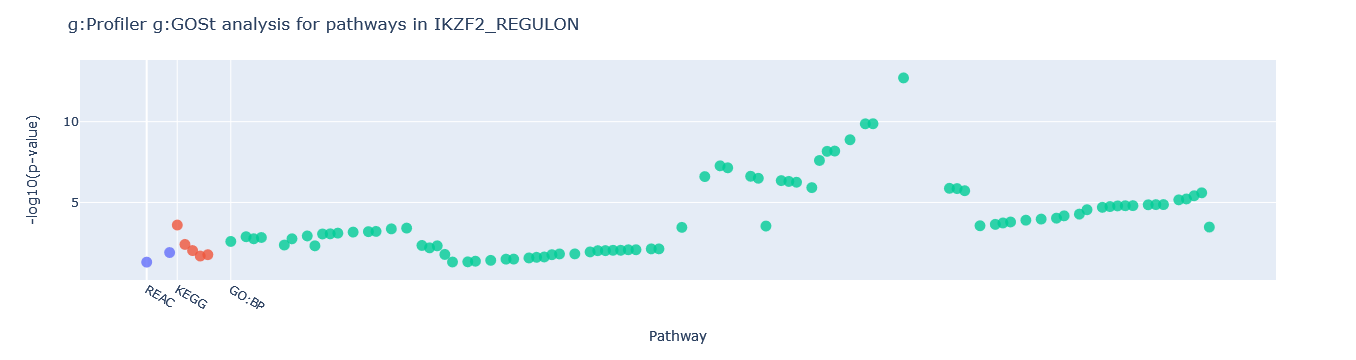

In [5]:
# show pathways enriched in specific GOI regulon

gprofiler = gg.gGOSt(regulon='IKZF2_REGULON') # set gene set of interest here

# What pathway databases do we want here? Reactome, KEGG, etc.? 
# easier access to pathway? link? 

## Network Visualization

In [6]:
goi_grn = gg.make_goi_grn(GOI=GOI)
len(goi_grn) # number of TF-target gene pairs in entire GOI GRN

2055

In [7]:
# GOI text summary:

gg.GOI_network_stats(goi_grn, GOI)
gg.format_gene_summary(goi_grn, GOI)

Summary of CASP8:

There are 8 regulons that have CASP8 in their target genes.

Regulons that have CASP8 in their target genes:

	(TF: GENIE3 Importance Score)
	IKZF2: 0.583
	IRF1: 0.479
	ELF1: 0.33
	RUNX3: 0.177
	GATA3: 0.161
	CREM: 0.122
	IKZF1: 0.106
	STAT1: 0.1


There are 77 TFs for CASP8 that were NOT supported by a regulon (motif analysis),
here are the top 10:

	(TF: GENIE3 Importance Score)
	YWHAZ: 2.754
	EZR: 2.1
	UBE2K: 1.437
	SOD1: 1.025
	ZNF529: 0.961
	LEF1: 0.911
	KLF6: 0.823
	SFPQ: 0.7
	ZNF275: 0.687
	PSMD12: 0.673
	HDAC1: 0.562

CASP8: 

	This gene encodes a member of the cysteine-aspartic acid protease (caspase) family.
	Sequential activation of caspases plays a central role in the execution-phase of
	cell apoptosis. Caspases exist as inactive proenzymes composed of a prodomain, a
	large protease subunit, and a small protease subunit. Activation of caspases requires
	proteolytic processing at conserved internal aspartic residues to generate a heterodimeric enzyme
	cons

In [14]:
# network visualization

# customize network viz:
# direct_TF = True (standard): only show GOI and it's direct regulating TFs (regulons)
# top_n = X: only show top X direct target genes of each TF
# other customize options? Hover data? 
# more overview, less customization

gg.make_network(goi_grn, GOI, direct_TF=True, top_n = 3) 

#gg.show_network() # only works on browser for now

gg.show_network() # only works on browser for now

## Gene gene adjacencies

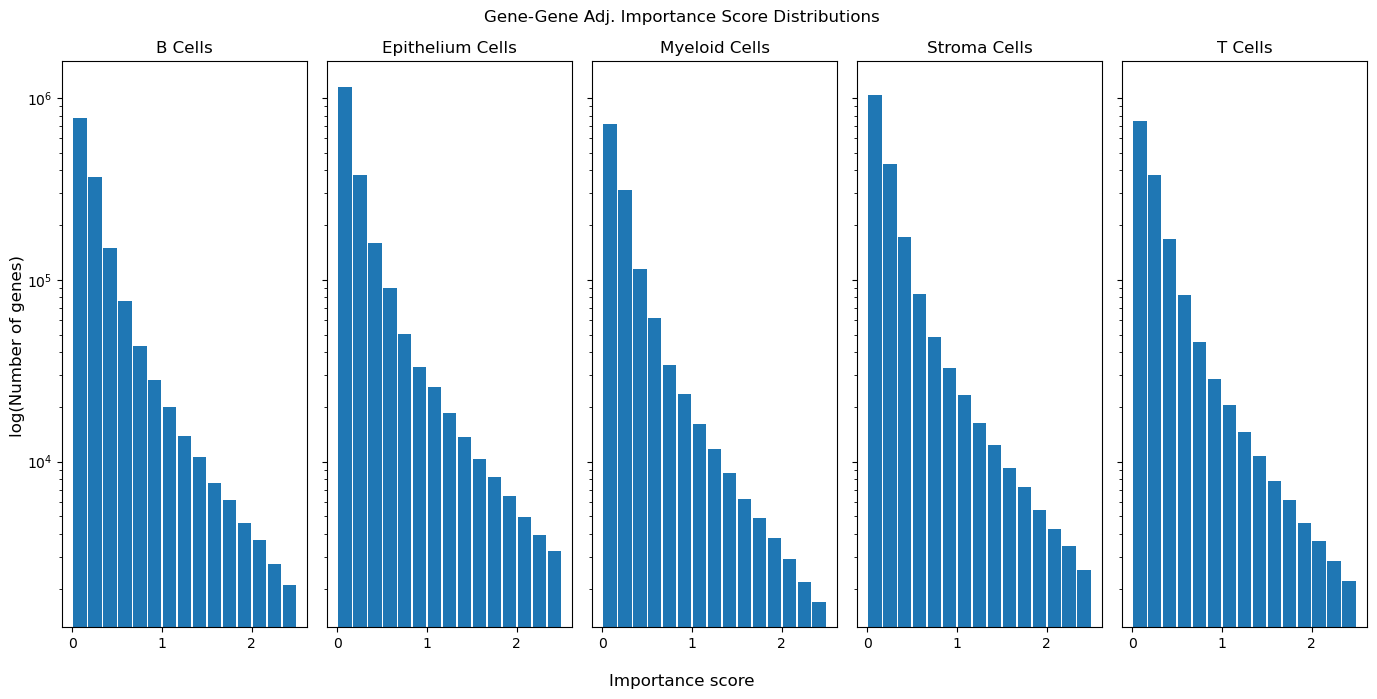

In [15]:
# first: look at importance score distribution for each cell lineage
gg.genegene_importance_histograms(log_scale=True, xlim=2.5)

In [ ]:
# Gene gene adjacencies

# Network of top n gene adjacencies for each cell lineage
# for each of these lineage gene adjacencies (gene set): 
#   List top n pathways associated with that gene set (just quick text list)
#   Try gesapy! 